# Cleaning Open Street Maps
What is the most common street name in Australia? This is question I wondered after seeing a __[Washington Post article](https://www.washingtonpost.com/blogs/govbeat/wp/2015/03/06/these-are-the-most-popular-street-names-in-every-state/)__ on the most common street name in America. What really got me is all the plant names - Cedar, Oak, and Aspen etc., and I thought - we don't do that in Australia - do we?. 

So I set out to find out. Sure there are __[articles](https://www.realestate.com.au/news/weird-and-common-australian-street-names/)__ out there that list the common streets in Australia, but where is the fun in that? 

When I started this project the __[Geocoded National Address File (G-NAF)](https://data.gov.au/dataset/geocoded-national-address-file-g-naf)__ wasn't yet available. I can't exactly remember what other soures of data I was looked at, but Open Street MAP (OSM) was the easiest to get hold of, so I used that. It also had the benefit that if I ever wanted to do this analysis on any other country the data would be available.  



## Cleaning OSM data
To start off with, I am just considering Sydney - Australia is just too big. Testing different ideas would take forever. And I live in Sydney and am familar with the streets. I should be able to notice any problems with my modelling. 


I got the data from __[metro extracts](https://mapzen.com/data/metro-extracts/)__ which is sadly shutting down at the end of January 2018. The geojson download gives you a folder of different files already divided up by map feature.

![File structue of Metro Maps geojson download](pictures/metro_maps_files.png)

Conveniently there is are three files deficated to the roads in Sydney. The two \gen files are generalised versions of the roads_gen file The roads_gen form  is a generalised version of the roads file - it incudes simplified coordinates. 

### Reading
First I need to read in the data. To do this I'm using geopandas as it can handle the geometry data - the longitude and latitude. As a first round of basic cleaning I'm removing all streets that do not have a defined name and then changing the street name to all lower case

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely
%matplotlib inline

In [2]:
streets = gpd.read_file('Sydney/ex_skDAYAuv8avqtvLU5LSdM4Fc7xxkR_roads.geojson')

streets = streets[~streets["name"].isnull()]
streets["name"] = streets["name"].apply(lambda x: x.lower())

This is what the data we get from metro extracts looks likes:

In [3]:
streets.head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,LINESTRING (151.2424485234584 -33.886582826295...,1.0,edgecliff road,0,1986039.0,None,None,0,residential,3.0
2,None,0,highway,LINESTRING (151.193104343295 -33.8876124592810...,3.0,cleveland street,1,1954876.0,None,None,0,primary,6.0
3,None,0,highway,LINESTRING (151.2112821767074 -33.845685509054...,4.0,cliff street,1,1986113.0,None,None,0,unclassified,3.0
4,None,0,highway,LINESTRING (151.0978939698709 -33.913194279223...,5.0,anglo road,1,1881386.0,None,None,0,residential,3.0
6,None,0,highway,LINESTRING (151.2108830304782 -33.847941079198...,7.0,northcliff street,1,1986116.0,None,None,0,residential,3.0


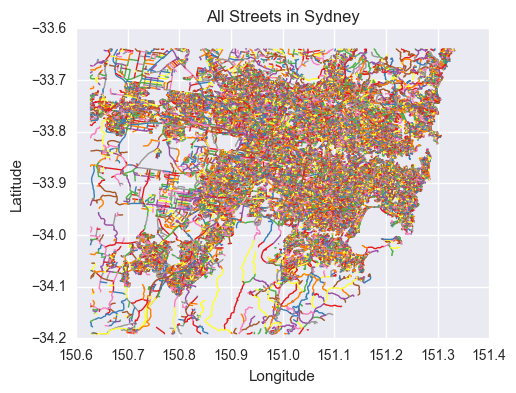

In [16]:
ax = streets['geometry'].plot()


ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_title("All Streets in Sydney")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

I like that you can identify the Royal National Park (the emptry patch in the bottom middle), Botany Bay (to the right of the Natioanl Park) and even the Harbour Bridge (the first crossing of the river harbour of Botany Bay)

## Data Cleanup
In OSM there a lot more than just streets are included.

There are three clsses *highway*, *railway* and *man-made*. The railway class include rail-lines (both goods and passenger), light rail lines (used and disued). These are not streets

In [4]:
streets['class'].unique()

array(['highway', 'railway', 'man_made'], dtype=object)

In [8]:
streets[streets["class"] == 'railway'].head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
58,None,0,railway,LINESTRING (151.196358365745 -33.8687554402545...,59.0,inner west light rail,1,2654260.0,None,None,0,light_rail,7.0
104,None,0,railway,LINESTRING (151.2011414987909 -33.879140366829...,105.0,inner west light rail,1,2761538.0,None,None,0,light_rail,7.0
361,None,0,railway,LINESTRING (151.1997885757997 -33.877948376379...,362.0,the goodsline,0,3188010.0,None,None,0,disused,7.0
11627,None,0,railway,LINESTRING (150.6417417467128 -33.757431025617...,11628.0,main western line,0,22720526.0,Up Main,None,0,rail,7.0
32383,None,0,railway,LINESTRING (151.0229891759798 -33.888670171642...,32384.0,sefton - chullora goods line,0,49493757.0,Sefton - Chullora Goods Line,None,0,rail,7.0


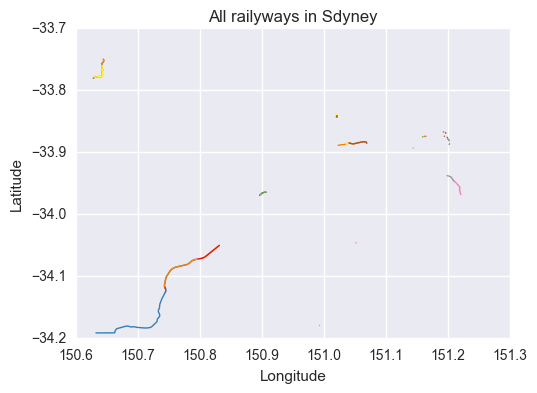

In [17]:
ax = streets[streets["class"] == 'railway']["geometry"].plot()


ax.set_title("All railyways in Sdyney")
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Let's look at the man-made class. This contains thing susch as the Fish Market and Taronga Zoo Ferry Wharf. And piers and groynes (low walls built out to sea to stop errosion).  Also not what I would call streets.

In [10]:
streets[streets["class"] == 'man_made'].head()

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
406,None,0,man_made,LINESTRING (151.1486958468153 -34.059200662259...,407.0,gunnamatta baths,0,3619874.0,None,None,0,pier,0.0
984,None,0,man_made,LINESTRING (151.1909980548465 -33.873133140643...,985.0,fish market,0,4332267.0,None,None,0,pier,20.0
1175,None,0,man_made,LINESTRING (151.2452296389314 -33.872377009158...,1176.0,double bay marina,0,4354558.0,None,None,0,pier,0.0
1183,None,0,man_made,LINESTRING (151.2398218864609 -33.845772177933...,1184.0,taronga zoo ferry wharf,0,4354530.0,None,None,0,pier,0.0
5455,None,0,man_made,LINESTRING (151.2308674993006 -33.847500107272...,5456.0,cremorne ferry wharf,0,9984522.0,None,None,0,pier,0.0


(150.6, 151.3)

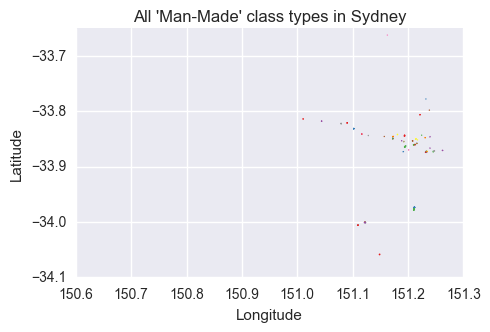

In [20]:
ax = streets[streets["class"] == 'man_made']["geometry"].plot(figsize = (5,10))
ax.set_title("All 'Man-Made' class types in Sydney")
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xlim((150.6, 151.3))

This leaves us with the highway class which contains actual streets. But also includes other things like footways and cycleways which are not roads. All of this information is contained in the 'type' attribute. For a complete list of highway types and explanations on what they are, have a look at the  __[OSM wiki](http://www.wiki.openstreetmap.org/wiki/Key:highway)__


The highway types we see in Sydney include:

In [22]:
streets[streets["class"] == 'highway']["type"].unique()

array(['residential', 'primary', 'unclassified', 'tertiary', 'secondary',
       'tertiary_link', 'pedestrian', 'service', 'footway', 'cycleway',
       'path', 'trunk', 'steps', 'primary_link', 'living_street',
       'motorway_link', 'secondary_link', 'motorway', 'track', 'bridleway',
       'trunk_link', 'raceway', 'road'], dtype=object)

At this point I needed to decide "What is a road?". Where do I draw the line between footway (pedestrains only), living_street (pedestrians have priority), cycleway (bikes allowed) or secondary_link (a road joining a motorway and another street)?

I decided I wanted to be as incusive as possible with this definition. Motorways should be included as they have names, such as the Hume Highway (some have less interesting names like the M5 Motorway). I felt that link roads should be included as they are also mostly named. Although there are also ones named 'Westlink M7 onramp', there shouldn't be so many of them that Westlink M7 is a contender for the most common street name. 

I the end I decided a street is something I'm allowed to  drive a car on. This means I will remove the pedestrian and non-car orientated streets. It also means I will remove private streets or those without public access, such as those at Holsworthy Barracks.  

There is also the 'access' column which gives information on who can access this road. (give link to OSM)

In [23]:
streets["access"].unique()

array([None, 'yes', 'private', 'public', 'no', 'designated', 'permissive',
       'destination', 'psv', 'delivery', 'official', 'hgv', 'bus',
       'yes|bicycle|yes|yes', 'yes|yes|bicycle|yes|yes', 'military'], dtype=object)

I wanted to keep as many streets as possible, but also keep it to roads that are public. I removed private roads, no access roads, military roads and HGV.

Note that 'None' just means that no access conditions have been recorded. 


In [24]:
streets[streets["access"] == 'hgv']

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
80102,hgv,0,highway,LINESTRING (150.8354220480671 -33.888192906075...,80103.0,truck stopping bay,0,225102002.0,None,None,0,service,0.0


Finally, there is service. This tag provides additional context on what the road is used for. There are a few services I want to exclude. Namely, driveway, private_road, bicycle_training_track, go-kart, drive-through (bye KFC drive-through) as they are not public roads I can drive on. I've kept parking_aile as I am driving on it before and after parking. 

In [25]:
streets["service"].unique()

array([None, 'alley', 'parking_aisle', 'driveway', 'yes', 'bus',
       'drive-through', 'Lane', 'emergency_access', 'parking', 'siding',
       'yard'], dtype=object)

In [26]:
def get_streets(df):
    clean_streets = df.dropna(subset = ["name"])
#     clean_streets.loc[:,"name"] = clean_streets["name"].apply(lambda x: x.lower())
    
    clean_streets = clean_streets[clean_streets["class"] == 'highway']
    
    
    clean_streets = clean_streets[clean_streets["type"] != "footway"]
    clean_streets = clean_streets[clean_streets["type"] != "cycleway"]
    clean_streets = clean_streets[clean_streets["type"] != "bridleway"]
    clean_streets = clean_streets[clean_streets["type"] != "track"]
    clean_streets = clean_streets[clean_streets["type"] != "raceway"]
    clean_streets = clean_streets[clean_streets["type"] != "pedestrian"]
    clean_streets = clean_streets[clean_streets["type"] != "steps"]
    clean_streets = clean_streets[clean_streets["type"] != "path"]
    
    clean_streets = clean_streets[clean_streets["access"] != "private"]
    clean_streets = clean_streets[clean_streets["access"] != "no"]
    clean_streets = clean_streets[clean_streets["access"] != "military"]
    clean_streets = clean_streets[clean_streets["access"] != "HGV"]
    
    clean_streets = clean_streets[clean_streets["service"] != "private_road"]
    clean_streets = clean_streets[clean_streets["service"] != "bicycle_training_track"]
    clean_streets = clean_streets[clean_streets["service"] != "go-kart"]
    clean_streets = clean_streets[clean_streets["service"] != "drive-through"]
    
    return clean_streets
clean_streets = get_streets(streets)

All of this processing removes just 3,268 streets out of the original 72,798 streets. 

To save the file you need to use the geopandas function to_file. This has the unfortunate side effect of making the working file much bigger - 55MB compared to 9MB for the original download. 

In [31]:
clean_streets.to_file("clean_streets_sydney.geojson")

This is all for cleaning up OSM street data. Next we will do some exploration on Sydney and other adjustments that need to be done. 